# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Top Run Scorers?](#section401)<br/>
    - 4.2 [Top Wicket Takers?](#section402)<br/>
    - 4.3 [Batsman hits most sixes and fours](#section403)<br/>
    - 4.4 [Run distribution Pie Chart](#section404)<br/>
    - 4.5 [Runs distribution based on Over intervals.](#section405)<br/>
    - 4.6 [Player taken maximum catches and run out.](#section406)<br/>
    - 4.7 [How batsman get dismissed mostly.](#section407)<br/>
    - 4.8 [Super over run distribution.](#section408)<br/>
    - 4.9 [Runs scored in first inning.](#section409)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

### 2. Data Loading and Description
![Indian Premier League](Indian_Premier_League_Logo.png)

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
deliveries = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv")

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

In [3]:
deliveries.shape

(164750, 21)

In [4]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

In [7]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [8]:
profilr_deliveies = pandas_profiling.ProfileReport(deliveries)
profilr_deliveies.to_file(outputfile="Deliveries_before_preprosessing.html")

<a id=section302></a>

### 3.3 Preprocessing

- Dealing with missing values
    - Adding "not out" in dismisaal kind where batsman is not out.
    - Adding "No Fielder" in fielder when it is not required.
    - Adding "No Dismissal" when no player is dismissed on that delivery.

In [9]:
deliveries.dismissal_kind.fillna("not out", inplace= True) #Adding "not out" in dismisaal kind where batsman is not out.

In [10]:
deliveries.fielder.fillna("No Fielder", inplace = True) #Adding "No Fielder" in fielder when it is not required.

In [11]:
deliveries.player_dismissed.fillna("No dismissal", inplace = True) #Adding "No Dismissal" when no player is dismissed on that delivery.

<a id=section304></a>

## 3.4 Post Pandas Profiling

In [12]:
profile = pandas_profiling.ProfileReport(deliveries)
profile.to_file(outputfile="Deliveries_after_preprocessing.html")

In [13]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,not out,No Fielder
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,not out,No Fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,No dismissal,not out,No Fielder
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No dismissal,not out,No Fielder
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,No dismissal,not out,No Fielder


<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Top Run Scorers.

Text(0.5, 1.0, 'Top Run Scorer')

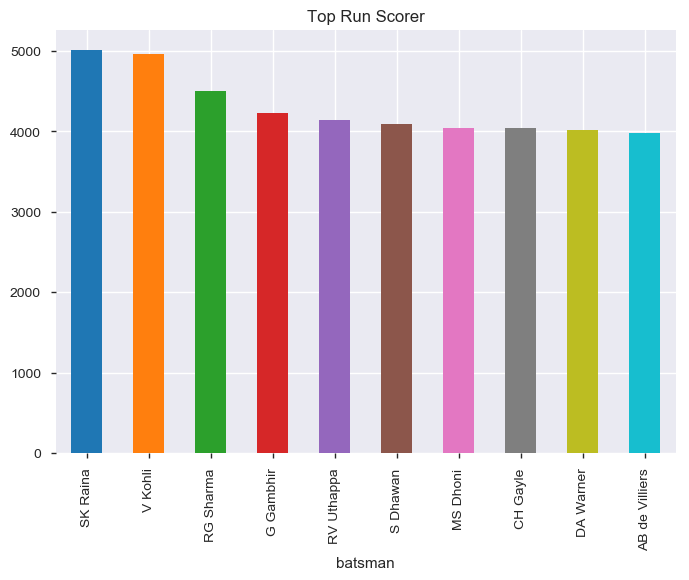

In [27]:
deliveries.groupby(["batsman"])["batsman_runs"].sum().nlargest(10).plot.bar().set_title("Top Run Scorer")

<a id=section402></a>

### 4.2 Top Wicket Takers.

In [15]:
out_list_by_bowler = ['caught', 'bowled', 'lbw','caught and bowled', 'stumped', 'hit wicket']
wicket_deliveries =  deliveries.loc[deliveries['dismissal_kind'].isin(out_list_by_bowler)]

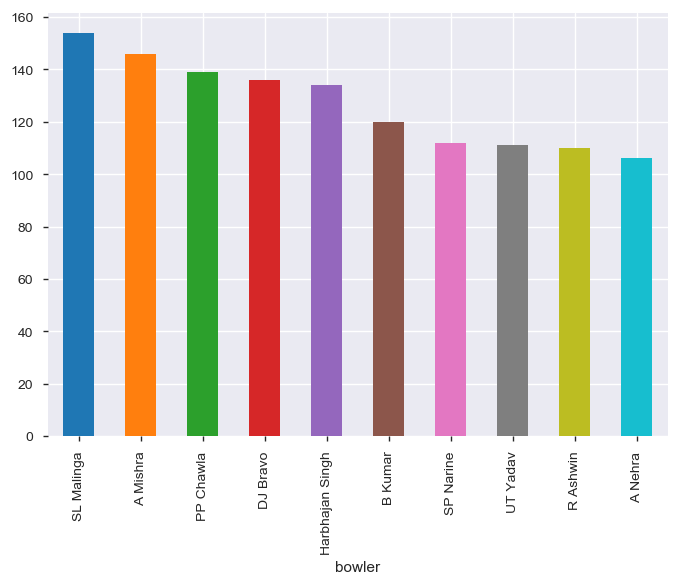

In [16]:
wicket_deliveries.groupby(["bowler"])["player_dismissed"].count().nlargest(10).plot.bar()

<a id=section403></a>

### 4.3 Batsman hits most sixes and fours.

In [29]:
fourAndSixes = deliveries.loc[(deliveries["batsman_runs"] == 4) | (deliveries["batsman_runs"] == 6)]

Text(0.5, 1.0, 'No of Four and sixes hit by top players')

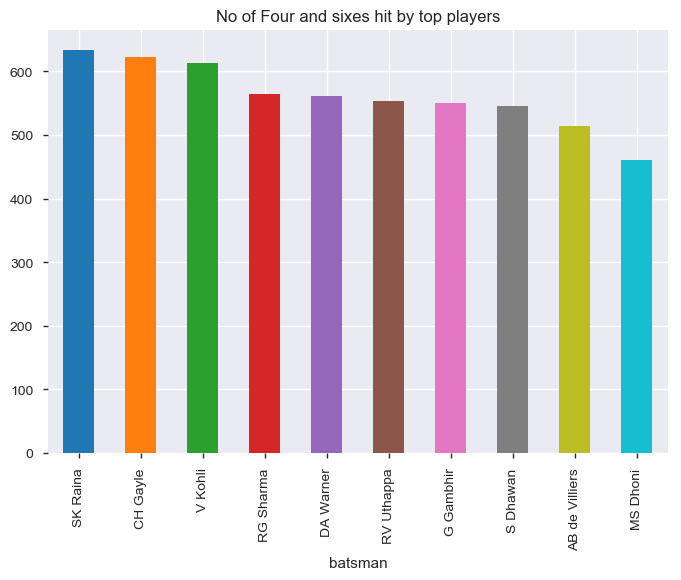

In [36]:
fourAndSixes.groupby(["batsman"])["batsman_runs"].count().nlargest(10).plot.bar(stacked = True).set_title("No of Four and sixes hit by top players")

- Interesting fact is that chris gayle has hit more four and sixes than Virat Kohli despite scored less runs.

<a id=section404></a>

### 4.4 Run distribution Pie Chart.

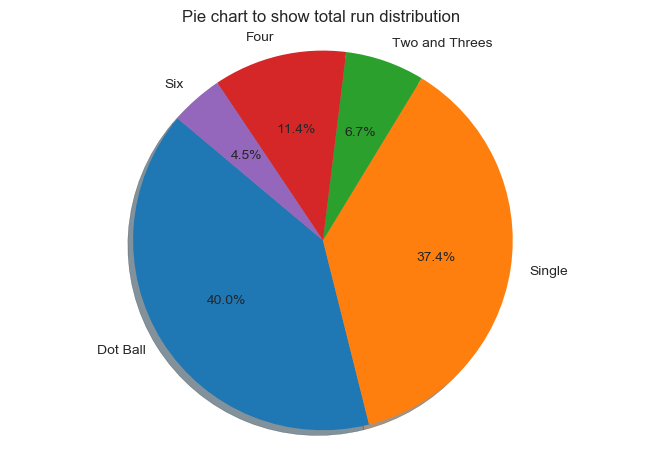

In [19]:
labels = ['Dot Ball','Single', 'Two and Threes', 'Four', 'Six']
sizes = [65904, 61580, 11103, 18707, 7392]
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Pie chart to show total run distribution ')
plt.show()

- it shows that most of the balls played as __dot__ or __single run__.

<a id=section405></a>

### 4.5 Runs distribution based on Over intervals.

Text(0.5, 1.0, 'Overs (14-20)')

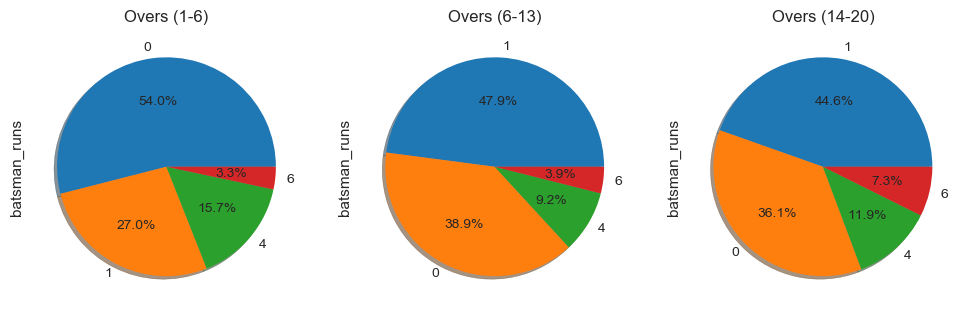

In [20]:
f,ax = plt.subplots(1,3,figsize=(12,7))
deliveries[(deliveries["over"] >= 1) & (deliveries["over"] < 7) & (deliveries["batsman_runs"].isin([0,1,4,6]))]["batsman_runs"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
deliveries[(deliveries["over"] >= 7) & (deliveries["over"] < 14) & (deliveries["batsman_runs"].isin([0,1,4,6]))]["batsman_runs"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
deliveries[(deliveries["over"] >= 14) & (deliveries["over"] <= 20) & (deliveries["batsman_runs"].isin([0,1,4,6]))]["batsman_runs"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Overs (1-6)')

ax[1].set_title('Overs (6-13)')
ax[2].set_title('Overs (14-20)')

<a id=section406></a>

### 4.6 Player taken maximum catches and run out.

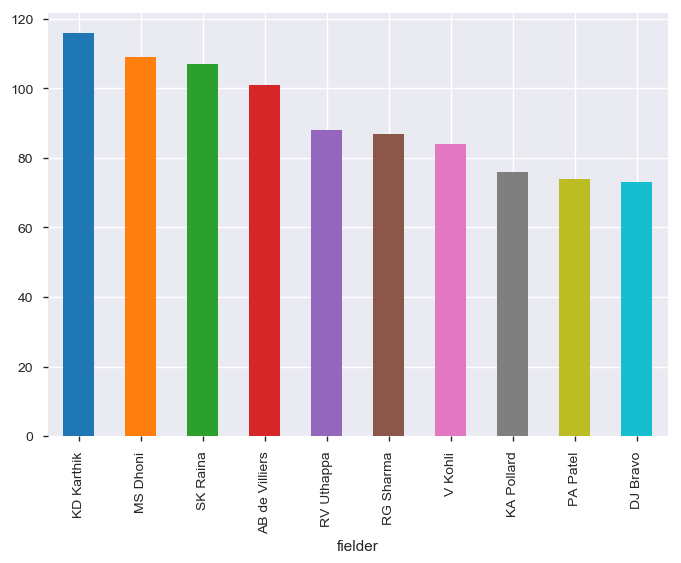

In [21]:
deliveries[deliveries["dismissal_kind"].isin(["caught","run out"])].groupby(["fielder"])["dismissal_kind"].count().nlargest(10).plot.bar()

<a id=section407></a>

### 4.7 How batsman get dismissed mostly.

In [37]:
deliveries[deliveries["dismissal_kind"] != "not out"].dismissal_kind.value_counts()

caught                   4861
bowled                   1495
run out                   813
lbw                       494
stumped                   262
caught and bowled         211
retired hurt               11
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

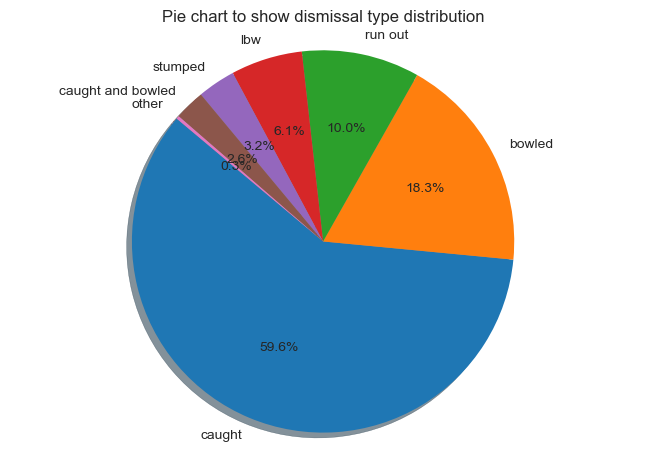

In [23]:
labels = ['caught','bowled', 'run out', 'lbw', 'stumped', 'caught and bowled', 'other']
sizes = [4861, 1495, 813, 494, 262, 211, 21]
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Pie chart to show dismissal type distribution')
plt.show()

- It stats that around __60 %__ players get __caught out__.

<a id=section408></a>

### Section 4.8 Super over run distribution

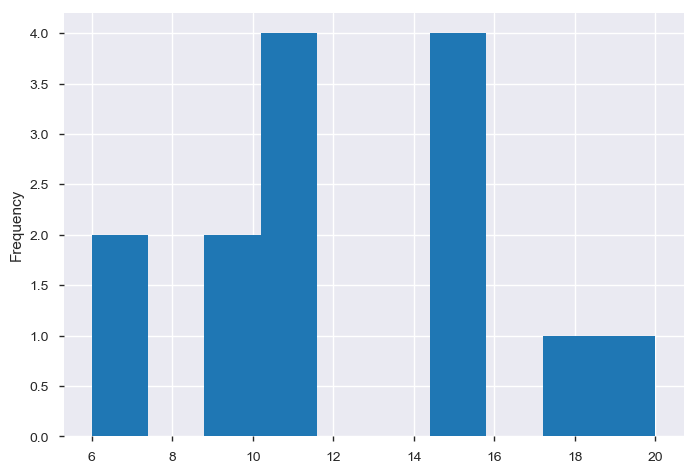

In [24]:
deliveries[deliveries["is_super_over"] == 1].groupby(["match_id","inning"])["total_runs"].sum().plot.hist()

<a id=section409></a>

### 4.9 Runs scored in first inning.

Text(0.5, 1.0, 'Run Scored by a team in first Inning')

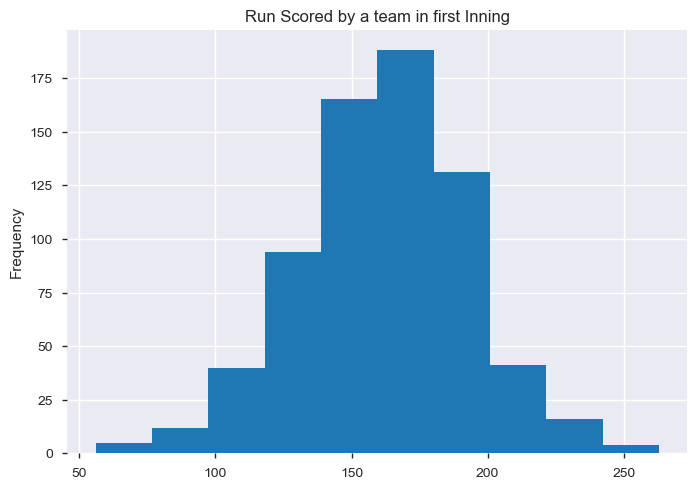

In [38]:
deliveries[deliveries["inning"]== 1].groupby(["match_id"])["total_runs"].sum().plot.hist().set_title("Run Scored by a team in first Inning")

- From this histogram we can see that mostly team scored between __150-200__ runs in first inning.

<a id=section5></a>

### Conclusion

- __Top Run Scorer__ are SG Raina, Virat Kohli and RG Sharma.
- __40 percent__ of deliveries are __dot__ deliveries and most are between __1-6__ over powerplay.
- Average target given by team lie between __150-200__.
- Around __60 percent__ of player dismissed by __caught out__.
